1. Start by creating a new Notebook for this assignment.

2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe

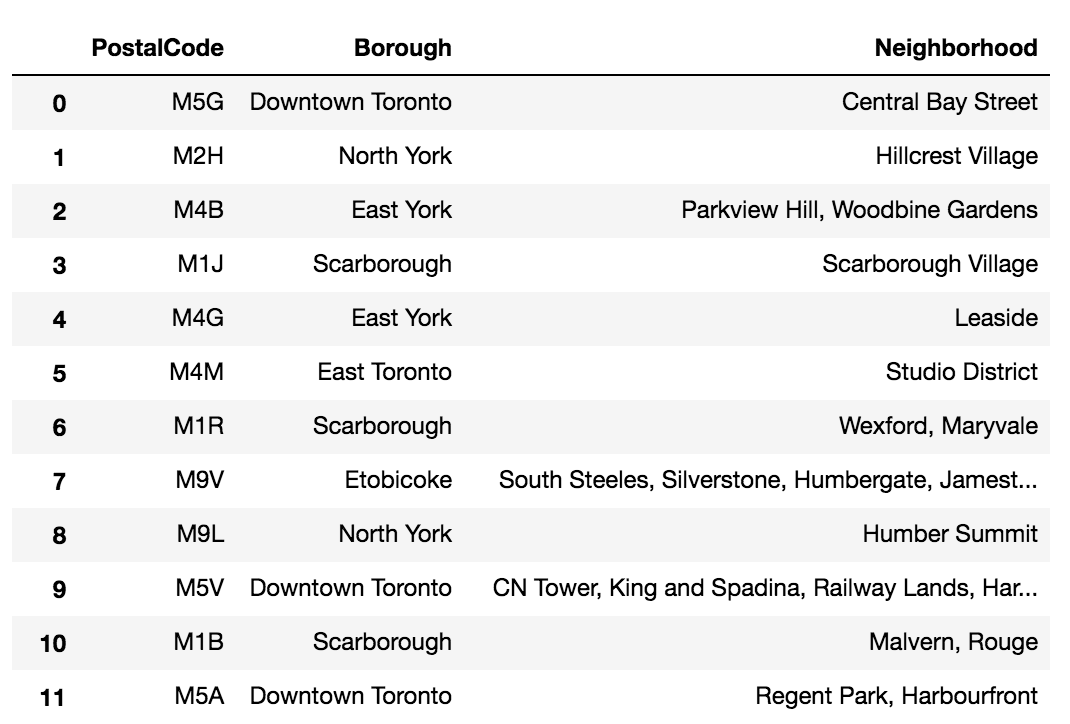

3. To create the above dataframe:

    The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
    Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
    More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

    If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
    Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
    In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

4. Submit a link to your Notebook on your Github repository. (10 marks)

Note: There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas to read the table into a pandas dataframe.
Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/
Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking postal code M5G as an example, your code would look something like this:

import geocoder # import geocoder

#initialize your variable to None
lat_lng_coords = None

#loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the following dataframe:

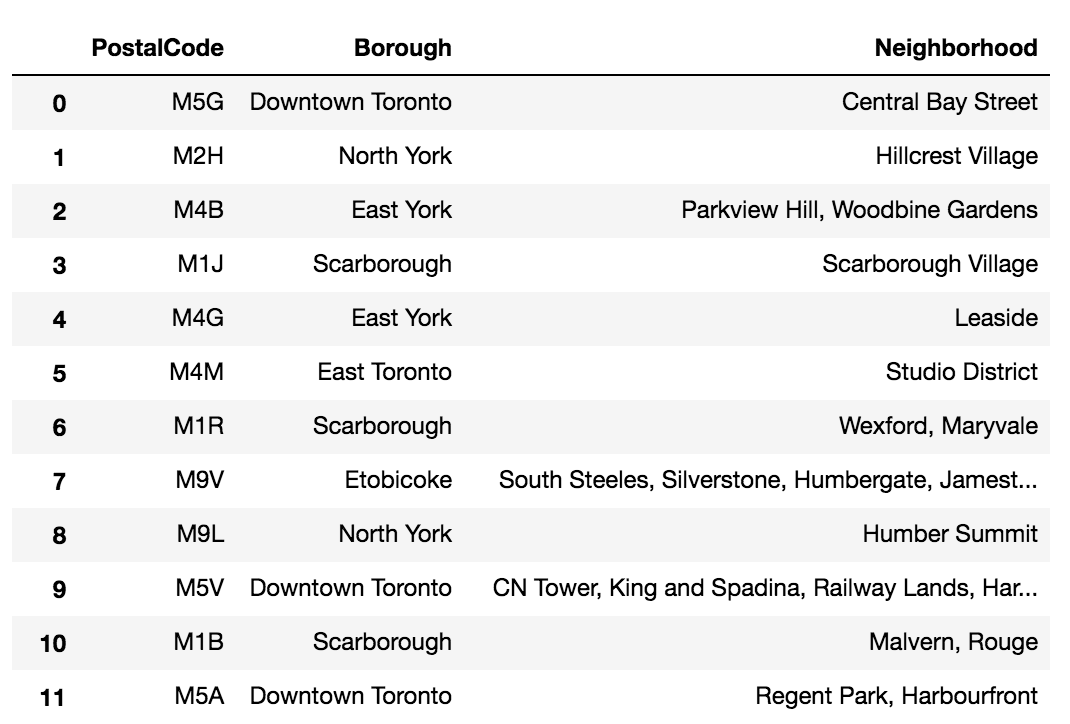

Important Note: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (2 marks)

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

Just make sure:

    to add enough Markdown cells to explain what you decided to do and to report any observations you make.
    to generate maps to visualize your neighborhoods and how they cluster together. 

Once you are happy with your analysis, submit a link to the new Notebook on your Github repository. (3 marks)

<h1>PART ONE<h1>
    
<b>Building a notebook in python to scrape websites, and load the wrangled data into a dataframe<b>

In [1]:
#import libraries

import pandas as pd
import requests
from bs4 import BeautifulSoup

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
res = requests.get(url)
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df_html = pd.read_html(str(table))
df_html[0].head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [3]:
new_df = df_html[0][df_html[0].Borough != 'Not assigned']
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(new_df['Borough'].unique()),
        new_df.shape[0]
    )
)
new_df.head()

The dataframe has 10 boroughs and 103 neighborhoods.


,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


<h1> PART TWO<h1>

<b> Wrangling the data frames to combined the Postal Codes and Longitudes and Littitudes together<b>

Install the required packages ...this takes some time!

In [5]:
!conda install -c conda-forge folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.11.0              |             py_0          61 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          87 KB

The following NEW packages will be INSTALLED:

    branca: 0.4.1-py_0  conda-forge
    folium: 0.11.0-py_0 conda-forge


folium-0.11.0        | 61 KB     | ##################################### | 100% 
branca-0.4.1         | 26 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [8]:
# !conda install geocoder

!conda install geopy

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be UPDATED:

    ca-certificates: 2020.6.20-hecda079_0     conda-forge --> 2020.6.24-0      
    certifi:         2020.6.20-py36h9f0ad1d_0 conda-forge --> 2020.6.20-py36_0 
    openssl:         1.1.1g-h516909a_0        conda-forge --> 1.1.1g-h7b6447c_0

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [15]:
from geopy.geocoders import Nominatim
import folium

In [24]:
#Get the CSV file with the Long / Lattitude as the Google Geocode API is flaky!  ie. not working
filename = "http://cocl.us/Geospatial_data"
df_long_lat = pd.read_csv(filename)
df_long_lat.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [26]:
#Join the two dataframes on the 'Post Code'
joined_df = new_df.set_index('PostalCode').join(df_long_lat.set_index('Postal Code'))
joined_df.head()

,Borough,Neighborhood,Latitude,Longitude
PostalCode,,,,
M3A,North York,Parkwoods,43.753259,-79.329656
M4A,North York,Victoria Village,43.725882,-79.315572
M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


Dataframe created with the postcodes, boroughs, neighborhoods, and location details of each....to use in part 3


.

<h1>PART THREE<h1>
<h3>Clustering the neighbourhoods and overlaying on the maps<h3>

In [21]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [86]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(joined_df['Latitude'], joined_df['Longitude'], joined_df['Borough'], joined_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [30]:
CLIENT_ID = 'YCOKU1BWIOJXX25LG5RZP0DDHFUV3DLMI2YSVG5XACCB5BZH' # your Foursquare ID
CLIENT_SECRET = 'U1HFQUYYMSCKHVMFNR3TLNP2GIQLAK2QGGSU4HKZSBPU1JKB' # your Foursquare Secret

VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YCOKU1BWIOJXX25LG5RZP0DDHFUV3DLMI2YSVG5XACCB5BZH
CLIENT_SECRET:U1HFQUYYMSCKHVMFNR3TLNP2GIQLAK2QGGSU4HKZSBPU1JKB


In [68]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#we are going to search for the top 10 Italian restaurants in each neighbourhood in Toronto
search_query = 'Italian'
radius = 300
LIMIT = 5

In [82]:
#Loop thru all the neighborhoods for Toronto, and find the local Italian Restaurants

for index, row in joined_df.iterrows():
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, row['Latitude'], row['Longitude'], VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    dataframe = json_normalize(venues)
    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]


In [84]:
dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Scaddabush Italian Kitchen & Bar,Italian Restaurant,"382 Yonge Street, Unit #7",CA,Toronto,Canada,Gerrard,373,"[382 Yonge Street, Unit #7 (Gerrard), Toronto ...","[{'label': 'display', 'lat': 43.65892029202872...",43.658920,-79.382891,M5B 1S8,ON,52f6816f11d24a43115dc834
1,Elm Street Italian Deli,Italian Restaurant,15 Elm Street,CA,Toronto,Canada,NaN,291,"[15 Elm Street, Toronto ON M5G 1G7, Canada]","[{'label': 'display', 'lat': 43.65769, 'lng': ...",43.657690,-79.382480,M5G 1G7,ON,5e594c8a3de308000870c948
2,Mustachio Italian Eatery,Italian Restaurant,595 Bay St,CA,Toronto,Canada,Dundas St,360,"[595 Bay St (Dundas St), Toronto ON M5G 2C2, C...","[{'label': 'display', 'lat': 43.65616, 'lng': ...",43.656160,-79.383190,M5G 2C2,ON,573df789498e03dd8e54b166
3,Sbarro,Pizza Place,220 Yonge Street,CA,Toronto,Canada,in Toronto Eaton Centre,250,"[220 Yonge Street (in Toronto Eaton Centre), T...","[{'label': 'display', 'lat': 43.655413, 'lng':...",43.655413,-79.380896,M5B 2H1,ON,4b4a2d09f964a520687d26e3
4,Consolato Italiano,Government Building,Beverly,CA,Toronto,Canada,Dundas,424,"[Beverly (Dundas), Toronto ON, Canada]","[{'label': 'display', 'lat': 43.6540714381019,...",43.654071,-79.375850,NaN,ON,516c1ef3e4b0b595c55461aa
5,Classic italian style pizza food truck,Food Truck,CNE Midway,CA,Toronto,Canada,NaN,464,"[CNE Midway, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.652144, 'lng':...",43.652144,-79.381118,NaN,ON,4c787c9181bca0936180fa14
6,Consolato Italiano,Government Building,Beverly,CA,Toronto,Canada,Dundas,289,"[Beverly (Dundas), Toronto ON, Canada]","[{'label': 'display', 'lat': 43.6540714381019,...",43.654071,-79.375850,NaN,ON,516c1ef3e4b0b595c55461aa
7,Scaddabush Italian Kitchen & Bar,Italian Restaurant,"382 Yonge Street, Unit #7",CA,Toronto,Canada,Gerrard,377,"[382 Yonge Street, Unit #7 (Gerrard), Toronto ...","[{'label': 'display', 'lat': 43.65892029202872...",43.658920,-79.382891,M5B 1S8,ON,52f6816f11d24a43115dc834
8,Elm Street Italian Deli,Italian Restaurant,15 Elm Street,CA,Toronto,Canada,NaN,395,"[15 Elm Street, Toronto ON M5G 1G7, Canada]","[{'label': 'display', 'lat': 43.65769, 'lng': ...",43.657690,-79.382480,M5G 1G7,ON,5e594c8a3de308000870c948
9,The Fresh Italian,Italian Restaurant,NaN,CA,Toronto,Canada,NaN,332,"[Toronto ON, Canada]","[{'label': 'display', 'lat': 43.65499143746528...",43.654991,-79.387897,NaN,ON,51bf3866498e55ee55df8db0


In [85]:
# keep only columns that include venue name, and anything that is associated with location

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]


<b>Now create a map of Toronto with the Italian Restaurants for the neighborhoods<b>
    and then plot on the map, with a marker for each

In [87]:
# create map of Toronto using latitude and longitude values
map_toronto2 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name, categories in zip(dataframe_filtered['lat'], dataframe_filtered['lng'], dataframe_filtered['name'], dataframe_filtered['categories']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto2)  
    
map_toronto2